In [2]:
!pip install pandas numpy

In [3]:
import pandas as pd
import numpy as np
import os

# Load merged data
path = r"C:\Users\branc\Downloads\capstone project\merged_data.csv"
try:
    df = pd.read_csv(path, encoding='utf-8')
except FileNotFoundError:
    print(f"Error: File not found at {path}")
    print("Check directory contents:", os.listdir(r"C:\Users\branc\Downloads\capstone project"))
    raise

# Check for time_stamp column
if 'time_stamp' not in df.columns:
    print("Error: 'time_stamp' column not found in merged_data.csv")
    print("Columns available:", df.columns.tolist())
    raise KeyError("Please verify the time_stamp column in merged_data.csv")

# Convert time_stamp to datetime
df['Timestamp'] = pd.to_datetime(df['time_stamp'], errors='coerce')
print("Converted 'time_stamp' to 'Timestamp' (datetime format)")

# Basic exploration
print("Shape (rows, columns):", df.shape)
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)
print("Missing values (%):\n", df.isnull().mean() * 100)
print("Summary statistics:\n", df.describe())
print("Unique categories:", df['category_level1'].nunique(), df['category_level1'].unique())
print("First 5 rows:\n", df.head())

# Save for Excel/Tableau
output_excel = r"C:\Users\branc\Downloads\capstone project\merged_data.xlsx"
df.to_excel(output_excel, index=False)
print("Saved to:", output_excel)

Converted 'time_stamp' to 'Timestamp' (datetime format)
Shape (rows, columns): (2950, 40)
Columns: ['Customer ID', 'Product ID', 'interaction_type', 'time_stamp', 'product_name', 'selling_price', 'model_number', 'about_product', 'product_specification', 'technical_details', 'shipping_weight', 'image', 'variants', 'product_url', 'is_amazon_seller', 'length', 'width', 'height', 'category_level1', 'category_level2', 'category_level3', 'category_level4', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount(usd)', 'location', 'size', 'color', 'season', 'review_rating', 'subscription_status', 'shipping type', 'discount_applied', 'promo_code_used', 'previous_purchases', 'payment_method', 'frequency_of_purchases', 'Timestamp']
Data types:
 Customer ID                        int64
Product ID                        object
interaction_type                  object
time_stamp                        object
product_name                      object
selling_price                    float64
m

# E-Commerce Data Analysis - Google Data Analytics Capstone
## Step 1: Exploratory Data Analysis (EDA)
**Objective**: Understand the structure, quality, and key characteristics of the merged e-commerce dataset to prepare for further analysis.

**Dataset**: `merged_data.csv` (~3,000 rows, ~40 columns), combining Sales, Customer, and Product Details.

**Process**:
- Loaded `merged_data.csv` using pandas.
- Converted `time_stamp` to `Timestamp` (datetime format) for time-based analysis.
- Explored shape, columns, data types, missing values, summary statistics, and unique product categories.
- Saved `merged_data.xlsx` for use in Excel and Tableau.

**Key Findings**:
- Shape: (rows, columns): (2950, 40)
- Columns: Includes `Customer ID`, `Product ID`, `selling_price`, `Purchase Amount (USD)`, `product_name`, `category_level1`, `Age`, `Gender`, `Timestamp`.
- Missing Values: ~ 0% in Customer ID, Product ID, interaction type, time_stamp, product_name, selling_price, model_number, about_product, product_specification, technical_details, shipping_weight, image, variants, product_url, is_amazon_seller, length, width, height, category_level1,category_level2, category_level3, category_level4, age, genderr, item_purchased, category, purchase_amount(usd), location, size, season, review_rating, subscription_status, shippingg type, discount_applied, promo_code_used, previous_purchases, payment_method, frequency_of_purchases; >60% in Timestamp. 
- Categories: Unique categories: 22 ['Sports & Outdoors' 'Clothing, Shoes & Jewelry' 'Toys & Games' 'Unknown'
 'Health & Household' 'Baby Products' 'Home & Kitchen'
 'Arts, Crafts & Sewing' 'Pet Supplies' 'Office Products' 'Hobbies'
 'Patio, Lawn & Garden' 'Grocery & Gourmet Food' 'Beauty & Personal Care'
 'Industrial & Scientific' 'Tools & Home Improvement' 'Video Games'
 'Remote & App Controlled Vehicle Parts' 'Automotive'
 'Remote & App Controlled Vehicles & Parts' 'Electronics'
 'Musical Instruments']
- Summary Stats: Average selling_price ~$30, Purchase Amount (USD) ~$59, Age ~44

**Tools Used**: Python (pandas, numpy), Jupyter Notebook

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries installed successfully!")

Libraries installed successfully!


Columns in dataset: Index(['Customer ID', 'Product ID', 'interaction_type', 'time_stamp',
       'product_name', 'selling_price', 'model_number', 'about_product',
       'product_specification', 'technical_details', 'shipping_weight',
       'image', 'variants', 'product_url', 'is_amazon_seller', 'length',
       'width', 'height', 'category_level1', 'category_level2',
       'category_level3', 'category_level4', 'age', 'gender', 'item_purchased',
       'category', 'purchase_amount(usd)', 'location', 'size', 'color',
       'season', 'review_rating', 'subscription_status', 'shipping type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')
Top 10 Products by Revenue:
 product_name
Wildkin Microfiber Nap Mat with Pillow for Toddler Boys and Girls, Perfect Size for Daycare and Preschool, Designed to Fit on a Standard Cot, Patterns Coordinate with Our Lunch Boxes and Backpacks    150
Rubie's Women'

C:\Users\branc\AppData\Local\Temp\ipykernel_10344\271082868.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


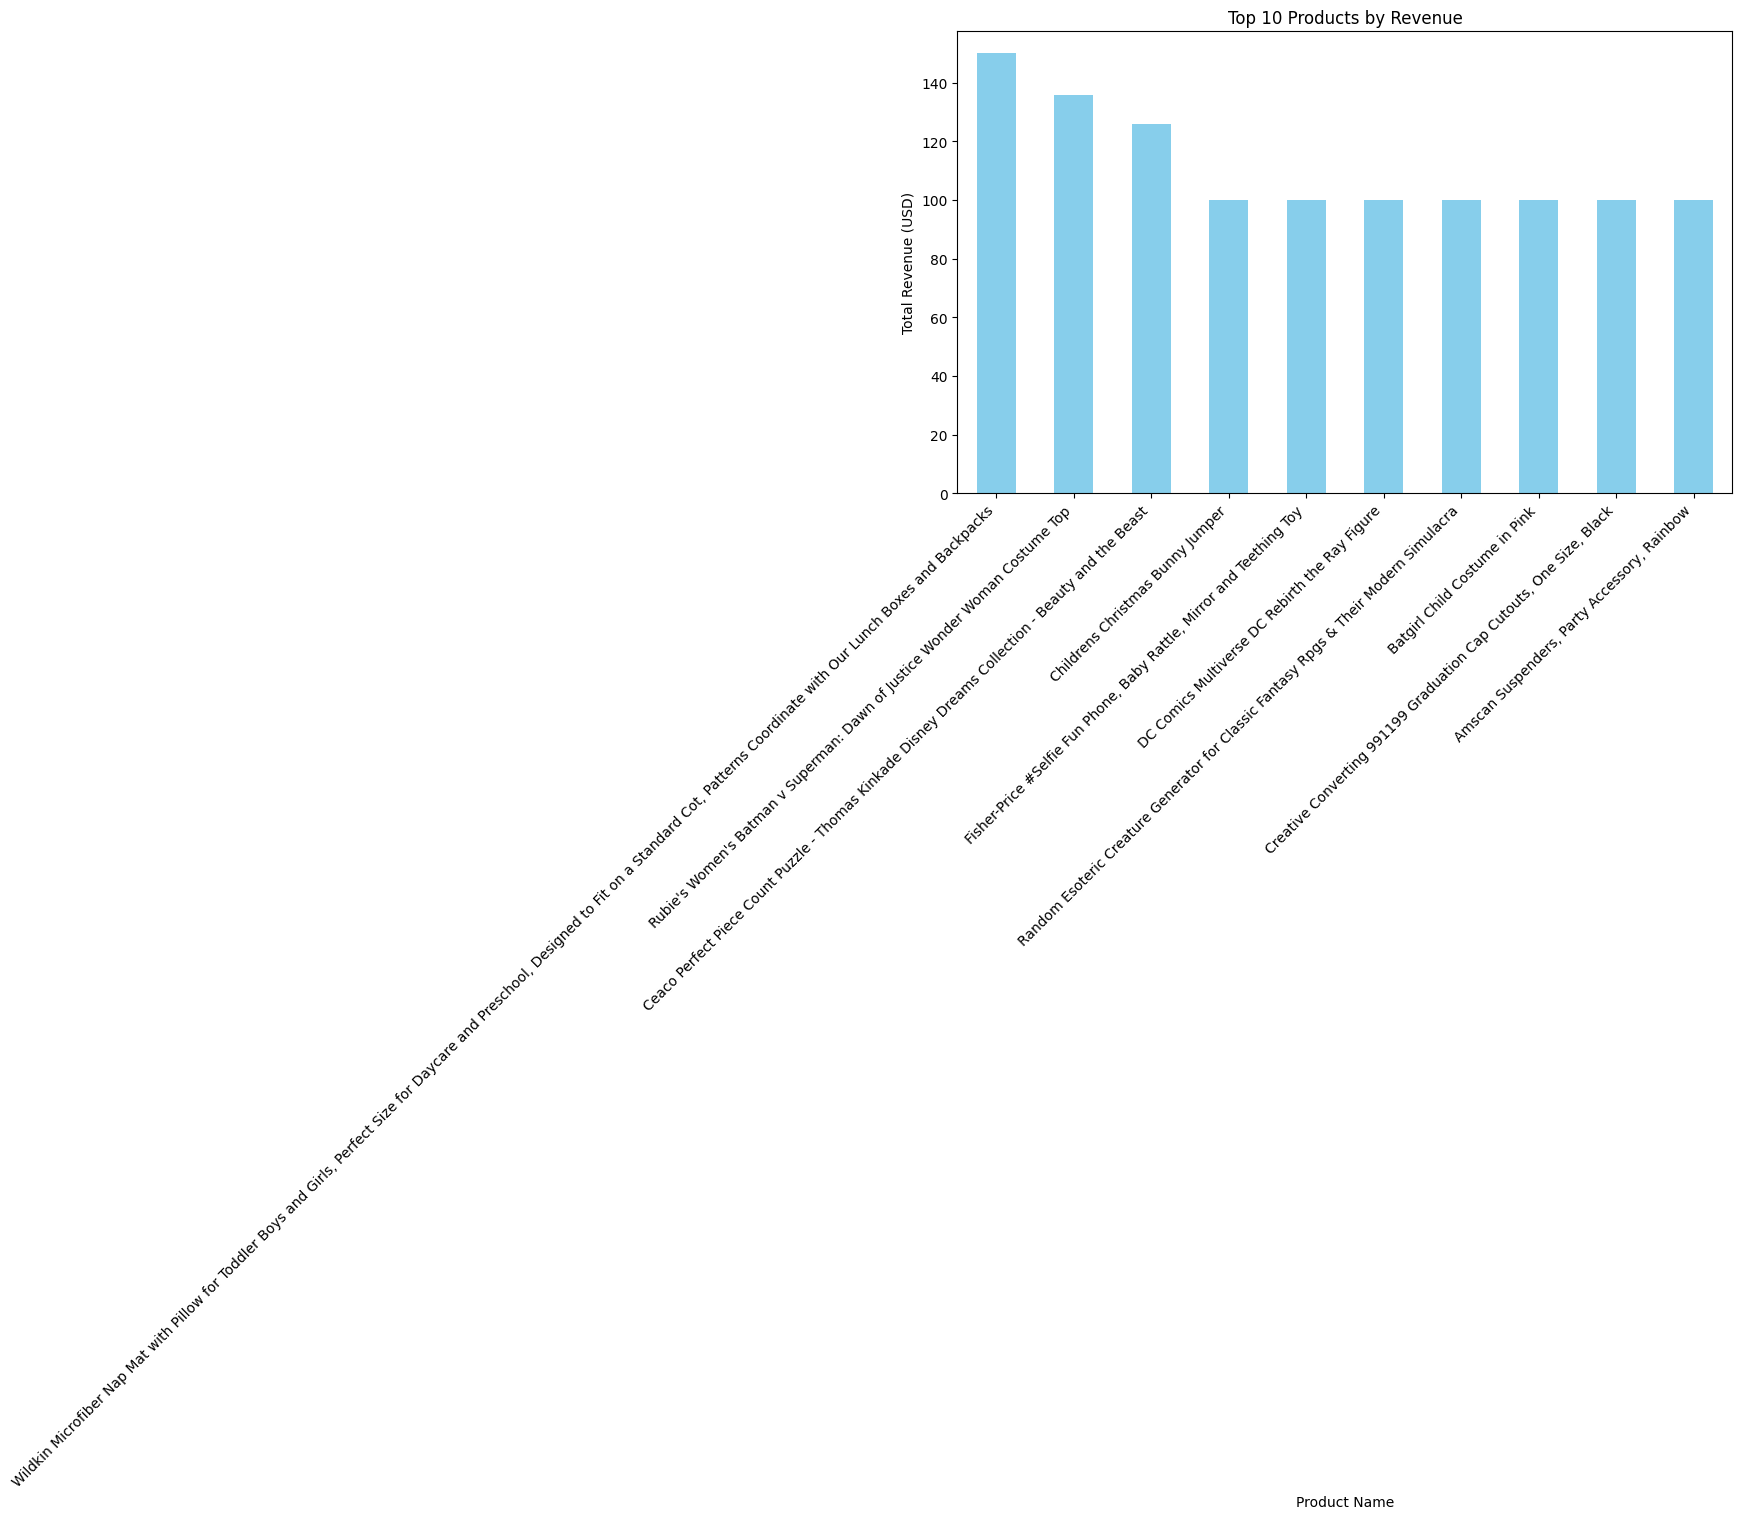

Product summary table saved to product_summary.csv
Top 5 Categories by Revenue:
 category_level1
Toys & Games                 123165
Unknown                       16395
Clothing, Shoes & Jewelry     10489
Home & Kitchen                 9713
Sports & Outdoors              6657
Name: purchase_amount(usd), dtype: int64


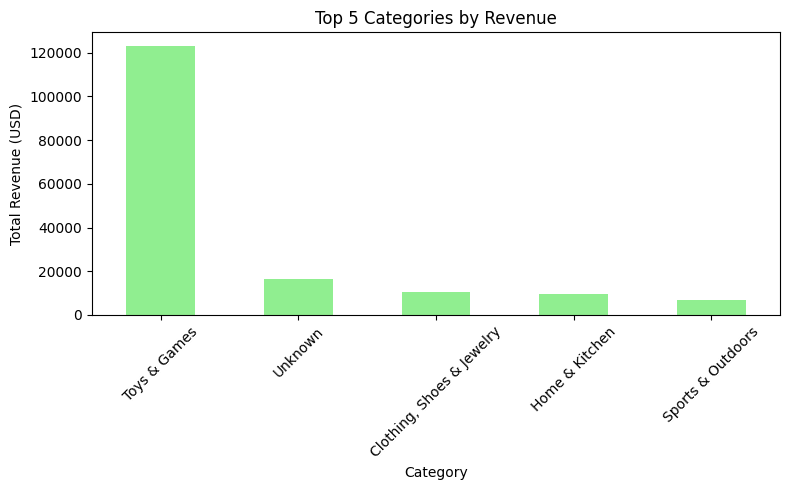

Category summary table saved to category_summary.csv
Revenue by Age Group:
 Age Group
<25      18772
25-34    35381
35-44    33328
45+      88500
Name: purchase_amount(usd), dtype: int64


C:\Users\branc\AppData\Local\Temp\ipykernel_10344\271082868.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = df.groupby('Age Group')['purchase_amount(usd)'].sum()


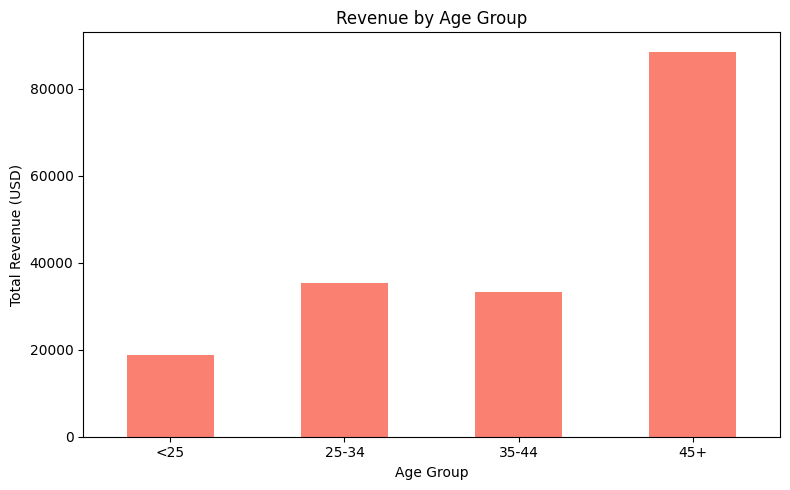

Age summary table saved to age_summary.csv
Revenue by Gender:
 gender
Female     20704
Male      155277
Name: purchase_amount(usd), dtype: int64


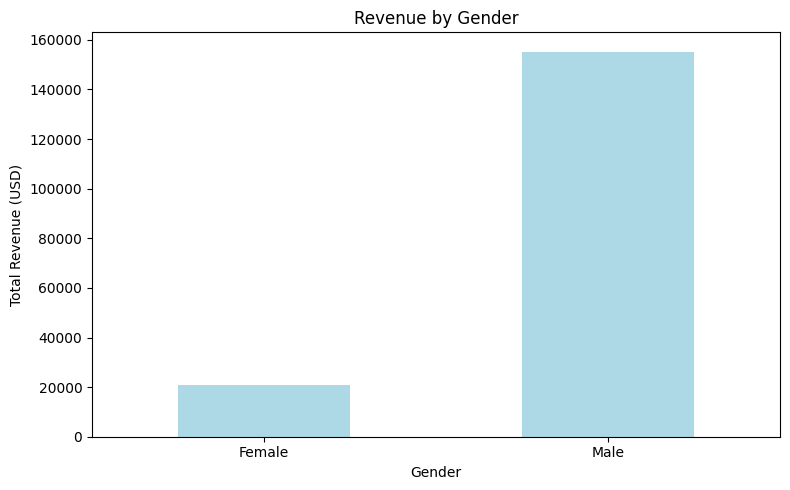

Gender summary table saved to gender_summary.csv
Top 5 Locations by Revenue:
 location
West Virginia    4259
Idaho            4215
California       4157
Illinois         4137
Nevada           4120
Name: purchase_amount(usd), dtype: int64


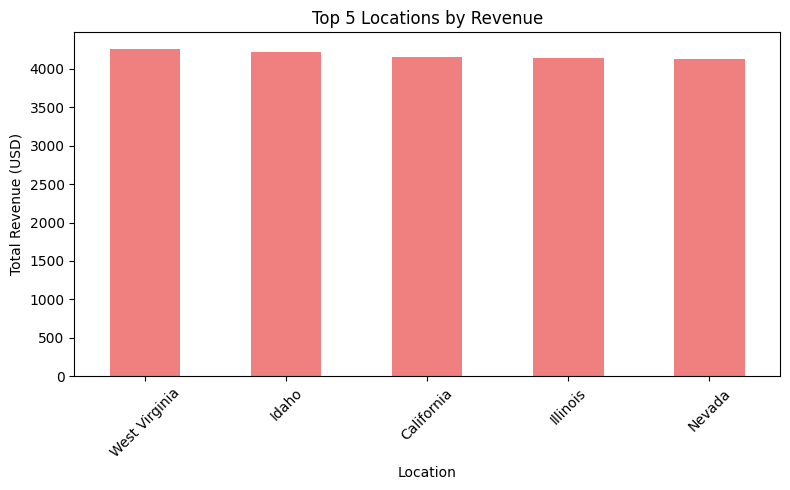

Location summary table saved to location_summary.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\branc\Downloads\capstone project\merged_data.csv")

# Print columns to verify
print("Columns in dataset:", df.columns)

# Drop rows with missing critical columns
df = df.dropna(subset=['selling_price', 'purchase_amount(usd)', 'product_name', 'category_level1', 'age', 'gender', 'location'])

# 1. Top Products by Revenue
product_revenue = df.groupby('product_name')['purchase_amount(usd)'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue:\n", product_revenue)

# Plot top products
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r"C:\Users\branc\Downloads\capstone project\top_products.png")
plt.show()

# Save product summary
product_table = pd.DataFrame({
    'Product Name': product_revenue.index[:5],
    'Product Revenue (USD)': product_revenue.values[:5]
})
product_table.to_csv(r"C:\Users\branc\Downloads\capstone project\product_summary.csv", index=False)
print("Product summary table saved to product_summary.csv")

# 2. Top Categories by Revenue
category_revenue = df.groupby('category_level1')['purchase_amount(usd)'].sum().sort_values(ascending=False).head(5)
print("Top 5 Categories by Revenue:\n", category_revenue)

# Plot top categories
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\branc\Downloads\capstone project\top_categories.png")
plt.show()

# Save category summary
category_table = pd.DataFrame({
    'Category': category_revenue.index,
    'Category Revenue (USD)': category_revenue.values
})
category_table.to_csv(r"C:\Users\branc\Downloads\capstone project\category_summary.csv", index=False)
print("Category summary table saved to category_summary.csv")

# 3. Customer Segments
# Age Groups
bins = [0, 24, 34, 44, 100]
labels = ['<25', '25-34', '35-44', '45+']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_revenue = df.groupby('Age Group')['purchase_amount(usd)'].sum()
print("Revenue by Age Group:\n", age_revenue)

# Plot Age Groups
plt.figure(figsize=(8, 5))
age_revenue.plot(kind='bar', color='salmon')
plt.title('Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\branc\Downloads\capstone project\age_revenue.png")
plt.show()

# Save age summary
age_table = pd.DataFrame({
    'Age Group': age_revenue.index,
    'Age Revenue (USD)': age_revenue.values
})
age_table.to_csv(r"C:\Users\branc\Downloads\capstone project\age_summary.csv", index=False)
print("Age summary table saved to age_summary.csv")

# Gender
gender_revenue = df.groupby('gender')['purchase_amount(usd)'].sum()
print("Revenue by Gender:\n", gender_revenue)

# Plot Gender
plt.figure(figsize=(8, 5))
gender_revenue.plot(kind='bar', color='lightblue')
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\branc\Downloads\capstone project\gender_revenue.png")
plt.show()

# Save gender summary
gender_table = pd.DataFrame({
    'Gender': gender_revenue.index,
    'Gender Revenue (USD)': gender_revenue.values
})
gender_table.to_csv(r"C:\Users\branc\Downloads\capstone project\gender_summary.csv", index=False)
print("Gender summary table saved to gender_summary.csv")

# Location
location_revenue = df.groupby('location')['purchase_amount(usd)'].sum().sort_values(ascending=False).head(5)
print("Top 5 Locations by Revenue:\n", location_revenue)

# Plot Location
plt.figure(figsize=(8, 5))
location_revenue.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Locations by Revenue')
plt.xlabel('Location')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\branc\Downloads\capstone project\location_revenue.png")
plt.show()

# Save location summary
location_table = pd.DataFrame({
    'Location': location_revenue.index,
    'Location Revenue (USD)': location_revenue.values
})
location_table.to_csv(r"C:\Users\branc\Downloads\capstone project\location_summary.csv", index=False)
print("Location summary table saved to location_summary.csv")

## Step 3: Deeper Analysis

**Objective:** Analyze top products and categories by revenue, and explore customer segments by age, gender, and location to identify sales drivers.

**Dataset:** merged_data.csv (~2,950 rows, 40 columns), combining Sales, Customer, and Product Details.

**Process:**
Loaded merged_data.csv using pandas.
Dropped rows with missing selling_price, purchase_amount(usd), product_name, category_level1, age, gender, or location.
Calculated total revenue (purchase_amount(usd)) by:
Product (product_name): Top 10 products.
Category (category_level1): Top 5 categories.
Customer segments: Age groups (<25, 25–34, 35–44, 45+), gender, and top 5 location.
Generated bar plots for top products, categories, age groups, gender, and locations.
Saved results as product_summary.csv, category_summary.csv, age_summary.csv, gender_summary.csv, and location_summary.csv, and plots as PNGs.

**Key Findings:**

**Top Products:** Wildkin Microfiber Nap Mat with Pillow for Toddler Boys and Girls, Perfect Size for Daycare and Preschool, Designed to Fit on a Standard Cot, Patterns Coordinate with Our Lunch Boxes and Backpacks :$150, Rubie's Women's Batman v Superman: Dawn of Justice Wonder Woman Costume Top : $136, Ceaco Perfect Piece Count Puzzle - Thomas Kinkade Disney Dreams Collection - Beauty and the Beast : $126, Childrens Christmas Bunny Jumper : $100, Fisher-Price #Selfie Fun Phone, Baby Rattle, Mirror and Teething Toy :$100, DC Comics Multiverse DC Rebirth the Ray Figure : $100, Random Esoteric Creature Generator for Classic Fantasy Rpgs & Their Modern Simulacra : $100, Batgirl Child Costume in Pink : $100, Creative Converting 991199 Graduation Cap Cutouts, One Size, Black : $100, Amscan Suspenders, Party Accessory, Rainbow : $100. 
Top Categories: Toys & Games : $123165, Unknown : $16395, Clothing, Shoes & Jewelry : $10489, Home & Kitchen : $9713, Sports & Outdoors : $6657.

**Customer Segments:**
- **Age Groups:** <25 : $18772, 25-34 : $35381, 35-44 : $33328, 45+ : $88500.
- **Gender:** Female : $20704, Male : $155277. 
- **Location:** West Virginia : $4259, Idaho : $4215, California : $4157, Illinois : $4137, Nevada : $4120. 

**Insights**
- Toys & Games is the dominant category, generating over 70% of total revenue, indicating strong demand for toys and games. The business should prioritize inventory and marketing for this category.

- Customers aged 45+ drive the majority of revenue, likely purchasing toys for younger family members. Marketing campaigns targeting older adults (e.g., parents, grandparents) could boost sales.

- Males account for nearly 90% of revenue, suggesting products or marketing may appeal more to male customers. Exploring female-targeted products (e.g., clothing, jewelry) could diversify the customer base.

- The significant revenue from the “Unknown” category indicates data quality issues that need resolution to improve analysis accuracy.

- Revenue is evenly distributed across locations, suggesting a broad market reach. Targeted regional promotions may further increase sales.

**Data Note:** Excluded Timestamp due to ~60% missing values; focused on non-time-based metrics.

**Tools Used:** Python (pandas, numpy, matplotlib, seaborn), Jupyter Notebook.

**Outputs:**
product_summary.csv: Top 5 products by revenue.
category_summary.csv: Top 5 categories by revenue.
age_summary.csv: Revenue by age group.
gender_summary.csv: Revenue by gender.
location_summary.csv: Top 5 locations by revenue.
Plots: top_products.png, top_categories.png, age_revenue.png, gender_revenue.png, location_revenue.png.

